C:\Users\tony\.conda\envs\svs2\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Pass orig_sr=22050, target_sr=16000 as keyword args. From version 0.10 passing these as positional arguments will result in an error


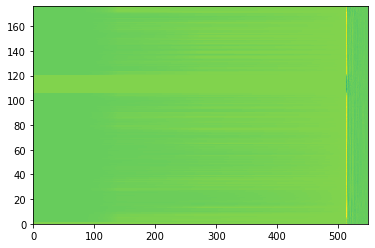

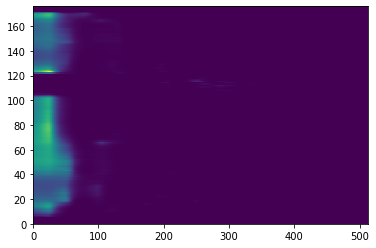

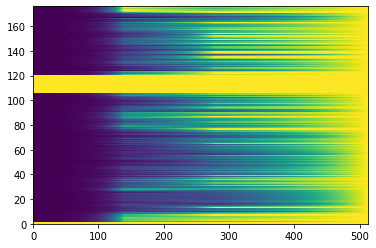

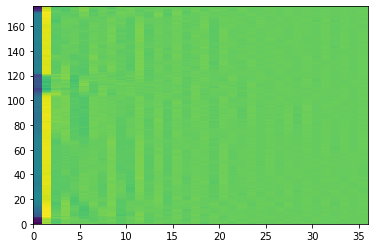

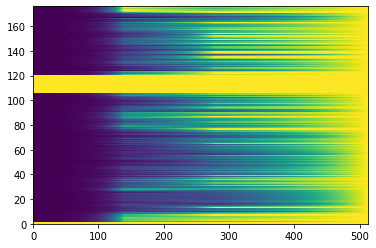

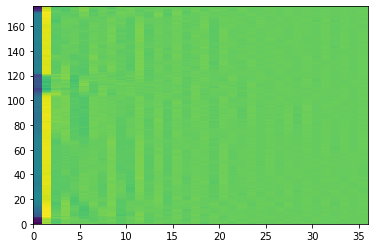

In [29]:
import pyworld
import librosa
import matplotlib.pyplot as plt
import numpy as np

def world_decompose(wav, fs, frame_period = 5.0):
    # Decompose speech signal into f0, spectral envelope and aperiodicity using WORLD
    wav = wav.astype(np.float64)
    f0, timeaxis = pyworld.harvest(wav, fs, frame_period = frame_period, f0_floor = 71.0, f0_ceil = 800.0)
    sp = pyworld.cheaptrick(wav, f0, timeaxis, fs)
    ap = pyworld.d4c(wav, f0, timeaxis, fs)
    return f0, timeaxis, sp, ap


def world_encode_spectral_envelop(sp, fs, dim=36):
    # Get Mel-cepstral coefficients (MCEPs)
    #sp = sp.astype(np.float64)
    coded_sp = pyworld.code_spectral_envelope(sp, fs, dim)
    return coded_sp

tar_sr = 16000
frame_period = 5.0
wav, sr = librosa.load('data/wav48k/falset/s19_falset_seg1.wav')
wav_new = librosa.resample(wav, sr, tar_sr)
f0, timeaxis, sp, ap = world_decompose(
    wav=wav_new, fs=sr, frame_period=frame_period)
coded_sp = world_encode_spectral_envelop(sp, sr, 36)
asp = np.concatenate((ap, coded_sp), axis=1)
ap_new = asp[:,0:513]
sp_new = asp[:,513:]
plt.figure()
plt.pcolor(asp)
plt.show()
plt.figure()
plt.pcolor(sp)
plt.show()
plt.figure()
plt.pcolor(ap)
plt.show()
plt.figure()
plt.pcolor(coded_sp)
plt.show()
plt.figure()
plt.pcolor(ap_new)
plt.show()
plt.figure()
plt.pcolor(sp_new)
plt.show()



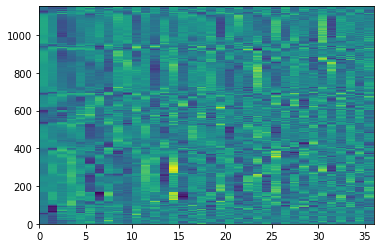

In [33]:
data = np.load('./data/mc/train/s1_chest_seg12.npy')
plt.figure()
plt.pcolor(data)
plt.show()
